In [1]:
import networkx as nx
import matplotlib.pyplot as plt 
import matplotlib as mpl
import numpy as np
import math
plt.rcParams['figure.dpi'] = 100

In [2]:
def setup_matrix(L, N):
    '''
    Set up an adjacency matrix A which is ring-shaped with one shortcut from node 1 to node L
    Inputs:
    - L: shortcut node
    - N: number of nodes
    Outputs:
    - Adjacency matrix A
    - Degree matrix D
    - Matrix S containing all reciprocal edges
    '''
    A = np.zeros((N, N))
    D = 2* np.eye(N)
    for i in range(N-1):
        A[i, i+1] = 1
        A[i+1, i] = 1
    A[0, L-1] = 1
    A[0, -1] = 1
    A[-1, 0] = 1
    
    #A_sq = np.matmul(A, A)
    S = np.copy(A)
    S[0, L-1] = 0
    
    return A, D, S

### Multiple rings visualisation

In [3]:
def setup_matrix(L, N, m):
    A = np.zeros((N, N))
    A_sq = np.matmul(A, A)
    D = 2 * np.eye(N)
    D[-1, -1] = 3
    for j in range(int(np.floor(N/m))):
        for i in range(j*m, (j+1)*m-1):
            A[i, i+1] = 1
            A[i+1, i] = 1
        A[j*m, L-1+j*m] = 1
        A[j*m, (j+1)*m-1] = 1
        A[(j+1)*m-1, j*m] = 1
        
    
        A[N-1, j*m] = 1
        A[j*m, N-1] = 1
        
        D[j*m, j*m] = 3
    S = np.copy(A)
    for j in range(int(np.floor(N/m))):
        S[j*m, L-1+j*m] = 0

    return A, D, S

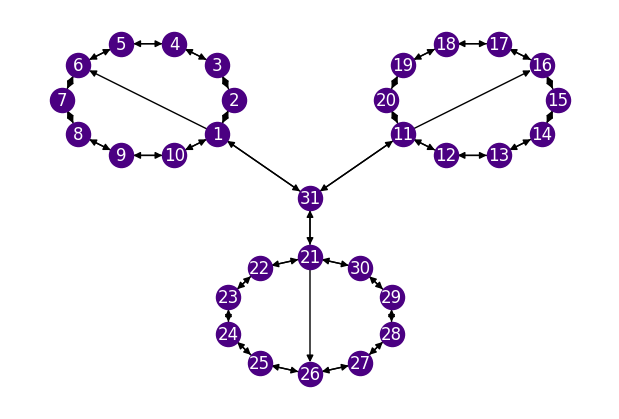

In [4]:
# --- Create the matrices and draw network
N = 31
m = 10
L = 6
A, D, S = setup_matrix(L, N, m)
G = nx.from_numpy_matrix(A, create_using=nx.MultiDiGraph)

# Set up positioning dictionary
pos = {}

for i in range(int(np.floor(N/m))):
    for x in range(m):
        if i == 0:
            pos[i*m+x] = (-1 - math.acos(math.pi/5) + math.cos(math.pi/5*x - math.pi/5),
                           1 + math.asin(math.pi/5) + math.sin(math.pi/5*x - math.pi/5))
        if i == 1:
            pos[i*m+x] = (1 + math.acos(math.pi/5) + math.cos(math.pi/5*x - 4*math.pi/5),
                          1 + math.asin(math.pi/5) + math.sin(math.pi/5*x - 4*math.pi/5))
        if i == 2:
            pos[i*m+x] = (math.cos(math.pi/5*x+math.pi/2),
                                    -2+math.sin(2*math.pi/10*x+math.pi/2))

pos[N-1] = (0,  0)

labeldict = {}
for i in range(N):
    labeldict[i] = i+1
    
nx.draw(G, pos=pos, labels=labeldict, font_color='white', node_color='indigo') 
plt.savefig('MultipleRings.pdf')
plt.show()

### Visulatisation of the 5-node modified ring network

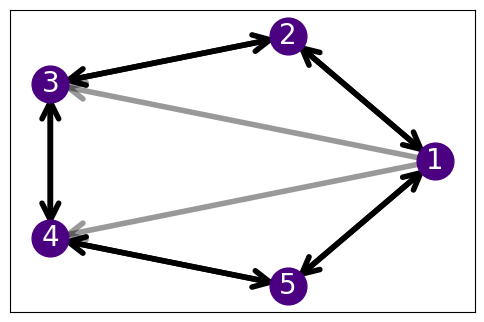

In [5]:
labeldict = {}
for i in range(5):
    labeldict[i] = i+1

G = nx.DiGraph()
G.add_edge(0, 1, weight=1)
G.add_edge(1, 2, weight=1)
G.add_edge(2, 3, weight=1)
G.add_edge(3, 4, weight=1)
G.add_edge(4, 0, weight=1)
G.add_edge(1, 0, weight=1)
G.add_edge(2, 1, weight=1)
G.add_edge(3, 2, weight=1)
G.add_edge(4, 3, weight=1)
G.add_edge(0, 4, weight=1)



G.add_edge(0, 2, weight=0.5)
G.add_edge(0, 3, weight=0.5)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.circular_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='indigo')

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=4, arrows=True, 
                       arrowstyle='->', arrowsize=30)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=4, alpha=0.4, 
                       arrowstyle='->', arrowsize=30)

# labels
labeldict = {}
for i in range(5):
    labeldict[i] = i+1
nx.draw_networkx_labels(G, pos, font_size=20, font_color='white', labels=labeldict)
plt.savefig('ExampleRing.pdf')
plt.show()

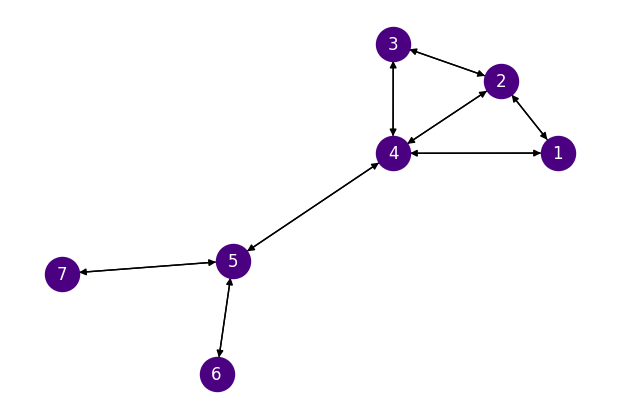

In [6]:
G = nx.DiGraph()
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(1,4)
G.add_edge(2,4)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(5,7)
G.add_edge(2,1)
G.add_edge(3,2)
G.add_edge(4,3)
G.add_edge(4,1)
G.add_edge(4,2)
G.add_edge(5,4)
G.add_edge(6,5)
G.add_edge(7,5)
nx.draw(G, with_labels=True, font_color = 'white', node_color='indigo', node_size=600)
plt.savefig('example.pdf')

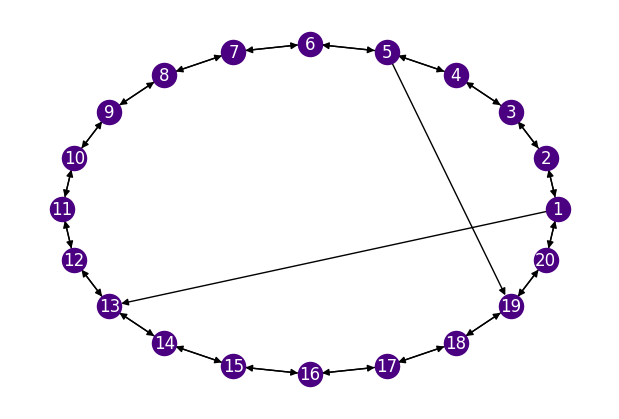

In [8]:
def setup_matrix_2(a1, L1, a2, L2, N):
    '''
    Set up an adjacency matrix A which is ring-shaped with one shortcut from node 1 to node L
    Inputs:
    - L1: shortcut node destination 1
    - L2: shortcut node destination 2
    - N: number of nodes
    Outputs:
    - Adjacency matrix A
    - Degree matrix D
    - Matrix S containing all reciprocal edges
    '''
    A = np.zeros((N, N))
    D = 2 * np.eye(N)
    for i in range(N-1):
        A[i, i+1] = 1
        A[i+1, i] = 1
    A[a1-1, L1-1] = 1
    A[a2-1, L2-1] = 1
    A[0, -1] = 1
    A[-1, 0] = 1
    
    #A_sq = np.matmul(A, A)
    S = np.copy(A)
    S[a1-1, L1-1] = 0
    S[a2-1, L2-1] = 0
    
    return A, D, S

a1 = 1
L1 = 13
a2 = 5
L2 = 19
N = 20

labeldict = {}
for i in range(N):
    labeldict[i] = i+1
    
percentage  = 0.6
A2, D, S = setup_matrix_2(a1, L1, a2, L2, N)

G = nx.from_numpy_matrix(A2, create_using=nx.MultiDiGraph)

nx.draw_circular(G, labels=labeldict, 
                font_color='white', 
                node_color='indigo'
                )
plt.savefig('multipleShortcut.pdf')
plt.show()